In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('Churn_Modelling.csv')

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [64]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [65]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [66]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [67]:
X=X.drop(['Geography','Gender'],axis=1)

In [68]:
X=pd.concat([X,geography,gender],axis=1)

In [69]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [72]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [73]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [74]:
X_train.shape

(8000, 11)

In [75]:
#ANN model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [77]:
#initialize ANN
classifier=Sequential()

In [78]:
#adding input layers
classifier.add(Dense(units=11,activation='relu'))

In [79]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [80]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [81]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [82]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [84]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [85]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.6296 - accuracy: 0.6992 - val_loss: 0.5111 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5097 - accuracy: 0.7970 - val_loss: 0.4639 - val_accuracy: 0.8008
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8048 - val_loss: 0.4432 - val_accuracy: 0.8103
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4536 - accuracy: 0.8192 - val_loss: 0.4320 - val_accuracy: 0.8164
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4404 - accuracy: 0.8220 - val_loss: 0.4175 - val_accuracy: 0.8220
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4246 - accuracy: 0.8287 - val_loss: 0.4036 - val_accuracy: 0.8300
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4086 - accuracy: 0.8369 - val_loss: 0.3941 - val_accuracy:

536/536 [==============================] - 2s 3ms/step - loss: 0.3557 - accuracy: 0.8537 - val_loss: 0.3643 - val_accuracy: 0.8482
Epoch 58/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8541 - val_loss: 0.3650 - val_accuracy: 0.8497
Epoch 59/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3551 - accuracy: 0.8571 - val_loss: 0.3644 - val_accuracy: 0.8470
Epoch 60/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3561 - accuracy: 0.8554 - val_loss: 0.3644 - val_accuracy: 0.8493
Epoch 61/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3492 - accuracy: 0.8565 - val_loss: 0.3619 - val_accuracy: 0.8504
Epoch 62/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3568 - accuracy: 0.8513 - val_loss: 0.3639 - val_accuracy: 0.8504
Epoch 63/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8552 - val_loss: 0.3624 - val_accuracy: 0.8512

In [86]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

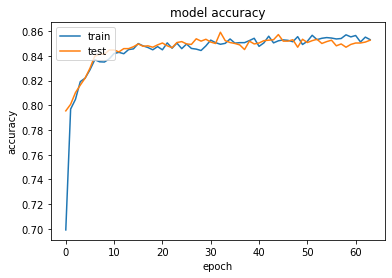

In [87]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [88]:
#making predictions and evaluating the model
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [89]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1549,   46],
       [ 239,  166]], dtype=int64)

In [90]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8575

In [91]:
#get the weights
classifier.get_weights()

[array([[ 0.30938557, -0.01315777,  0.01974799, -0.27774692, -0.18649872,
         -0.24210644, -0.16346374, -0.02295346,  0.07060796, -0.04706221,
         -0.02805746],
        [-0.834327  ,  0.58836234, -0.63217485,  0.9439324 , -0.7492671 ,
          0.18628693,  0.2614147 , -0.6632396 ,  0.17064644,  0.21450464,
         -0.79870296],
        [-0.07886148,  0.05232575,  0.27650395,  0.23617661,  0.43518233,
          0.1186201 ,  0.22206149,  0.06875832,  0.23863055, -0.04291377,
          0.07407601],
        [ 0.0908364 ,  0.3923537 ,  0.57186717,  0.0863848 ,  0.36454248,
          0.09713718, -0.24803482, -0.0042007 , -0.15272515,  0.78648454,
          0.41187435],
        [-0.284711  , -0.3063845 ,  0.06240058,  0.23683038, -0.17091869,
         -0.5924708 , -1.4775052 ,  0.0036483 ,  0.90439266,  0.98907626,
          0.09019458],
        [ 0.37746552,  0.01664497,  0.21203324,  0.3499916 , -0.04152579,
          0.41708675, -0.03109732, -0.22793256,  0.01930353,  0.0643463